In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import pandas as pd

df = pd.read_csv("/content/housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322       126.0         8.3252            452600.0        NEAR BAY  
1        2401      1138.0         8.3014            358500.0        NEAR BAY  
2         496       177.0         7.2574            352100.0        NEAR BAY  
3         558       219.0         5.6431            341300.0        NEAR BAY  
4         565         NaN         3.8462            342200.0        NEAR BAY

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20429.000000  20640.000000  20636.000000   20640.000000   
mean       537.899848   1425.476744    499.575111       3.870671   
std        421.419669   1132.462122    382.357541       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20638.000000  
mean        206852.449898  
std         115400.700475  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264775.000000  
max         500001.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [8]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [9]:
df['total_bedrooms'].isnull().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['ocean_proximity'] = LabelEncoder.fit_transform(df['ocean_proximity'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.6 MB


outliers

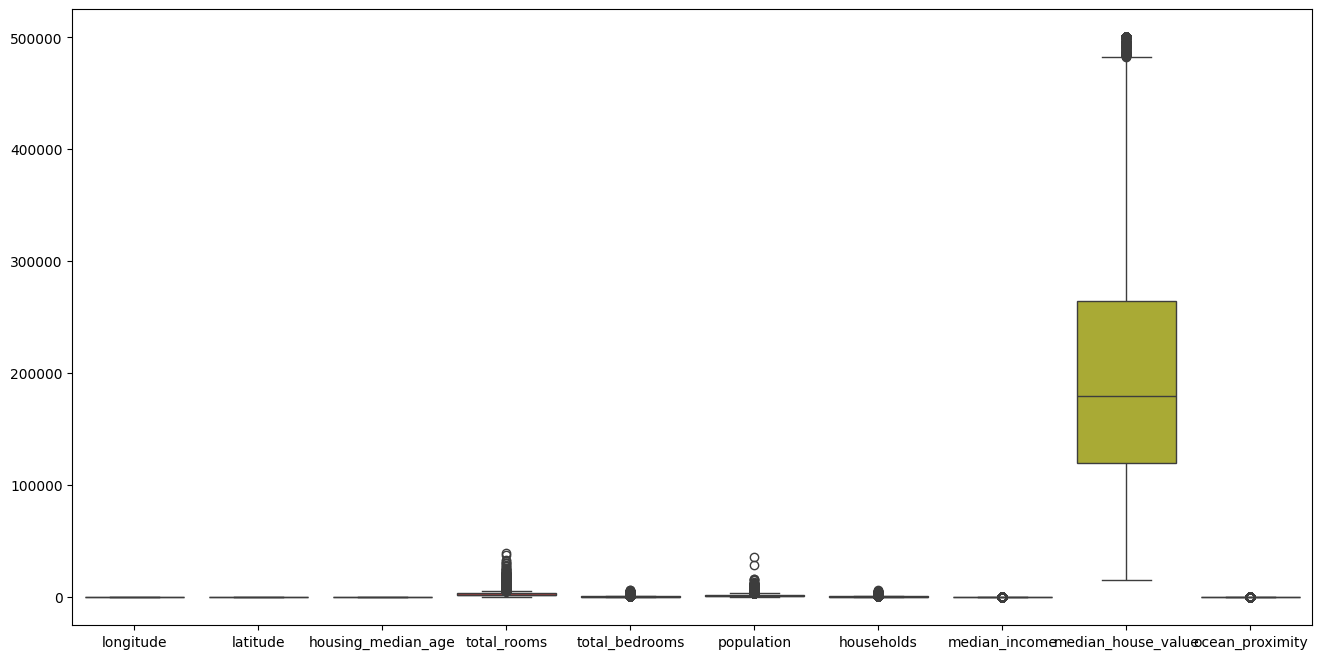

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.show()

In [13]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [14]:
# Iterate through numerical columns
for column in numerical_columns:
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median (or choose another strategy)
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         median_value, df[column])

In [15]:
# Iterate through numerical columns
for column in numerical_columns:
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with a value within the outlier boundaries, or use a different strategy like imputation
    # For example, replacing with the lower/upper bound:
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    # Alternatively, you could impute missing values using SimpleImputer from sklearn

normalize

In [16]:
from sklearn.preprocessing import MinMaxScaler


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numerical data and transform it
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88            0.784314     0.179960        0.129162   
1        -122.22     37.86            0.392157     0.435551        1.000000   
2        -122.24     37.85            1.000000     0.300274        0.190716   
3        -122.25     37.85            1.000000     0.260716        0.236125   
4        -122.25     37.85            1.000000     0.333069        0.281534   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48            0.470588     0.340857        0.376387   
20636    -121.21     39.49            0.333333     0.142451        0.150353   
20637    -121.22     39.43            0.313725     0.461582        0.488396   
20638    -121.32     39.43            0.333333     0.380825        0.411705   
20639    -121.24     39.37            0.294118     0.570418        0.620585   

       population  households  median_income  median_house_value  \
0        0.117539    0.133120       0.432307            1.000000   
1        0.883567    0.434505       0.432307            0.839648   
2        0.181651    0.187433       0.962573            0.824004   
3        0.204495    0.232162       0.732623            0.797605   
4        0.207074         NaN       0.476664            0.799805   
...           ...         ...            ...                 ...   
20635    0.310243    0.350373       0.151049            0.154243   
20636    0.130066    0.120341       0.292995            0.151799   
20637    0.369934    0.460064       0.170948            0.188953   
20638    0.271923    0.370607       0.194765            0.170376   
20639    0.509948    0.563365       0.269036            0.181865   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20640 rows x 10 columns]

In [ ]:
# from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Check the class distribution
# class_counts = pd.Series(y).value_counts()
# minority_class_count = class_counts.min()

# # Create an imputer object with a mean filling strategy
# imputer = SimpleImputer(strategy='mean')

# # Impute the missing values
# X_imputed = imputer.fit_transform(X)

# # Set k_neighbors to be less than or equal to the number of samples in the minority class
# k_neighbors = min(4, minority_class_count - 1)

# # Apply SMOTE
# smote = SMOTE(k_neighbors=k_neighbors)
# X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# # Check the value counts of the resampled target variable
# print(pd.Series(y_resampled).value_counts())



ocean_proximity
3    9136
5    9136
0    9136
1    9136
4    9136
2    9136
Name: count, dtype: int64


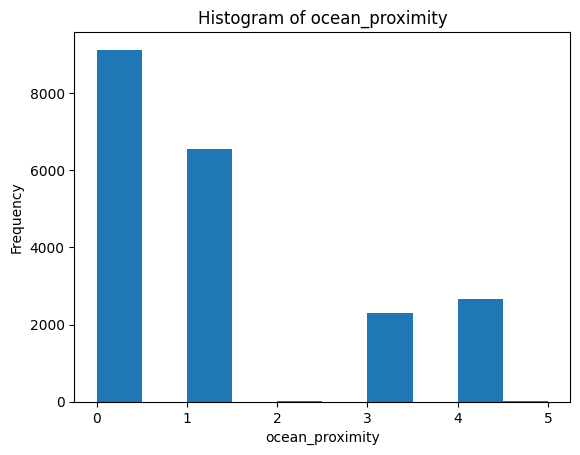

In [17]:
plt.hist(df['ocean_proximity'])
plt.xlabel('ocean_proximity')
plt.ylabel('Frequency')
plt.title('Histogram of ocean_proximity')
plt.show()

**plot histograms and density plots for each numerical variable (e.g., housing_median_age, total_rooms, etc.).**

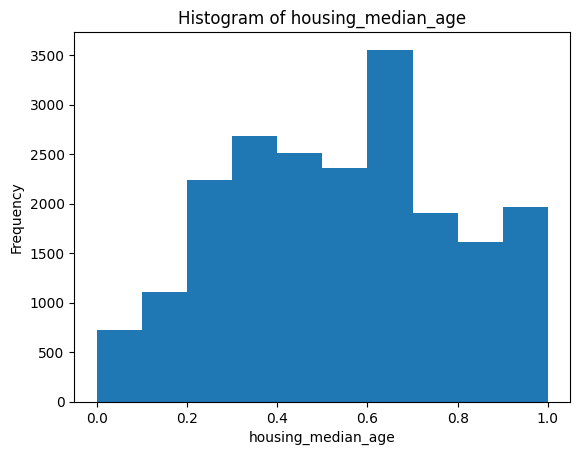

In [18]:
plt.hist(df['housing_median_age'])
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.title('Histogram of housing_median_age')
plt.show()

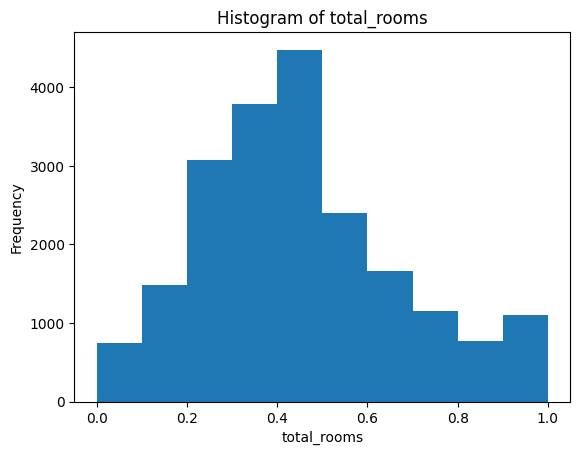

In [19]:
plt.hist(df['total_rooms'])
plt.xlabel('total_rooms')
plt.ylabel('Frequency')
plt.title('Histogram of total_rooms')
plt.show()

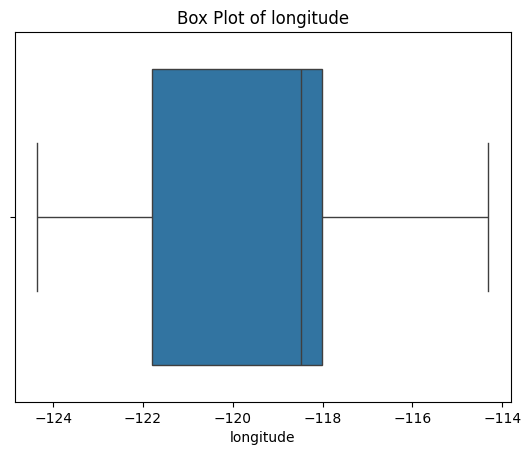

In [20]:
sns.boxplot(x=df['longitude'])
plt.title('Box Plot of longitude')
plt.show()

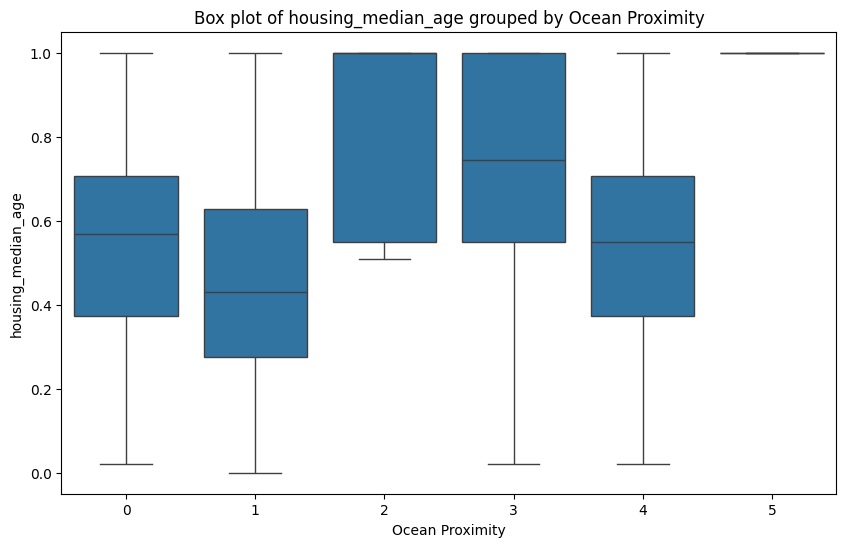

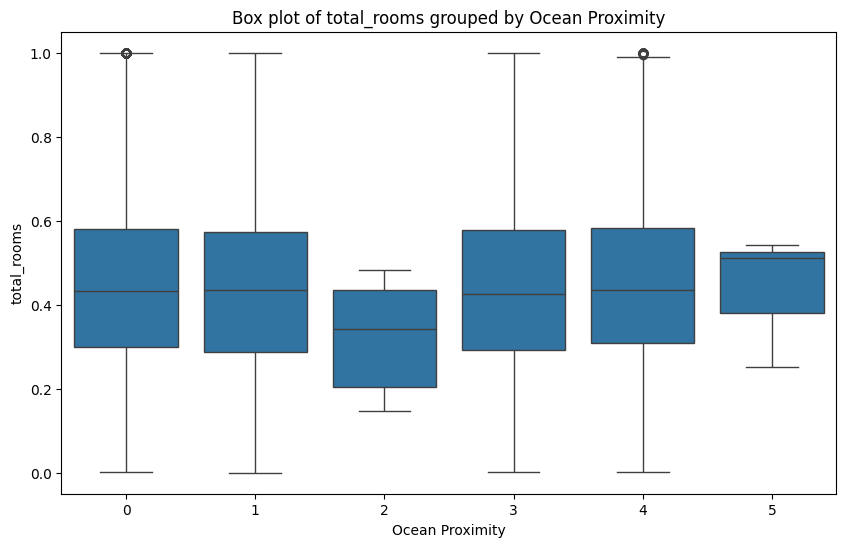

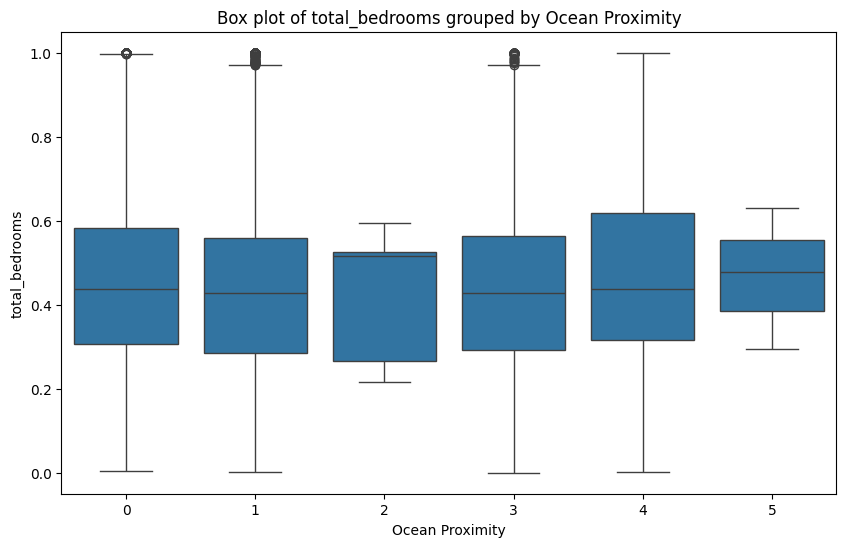

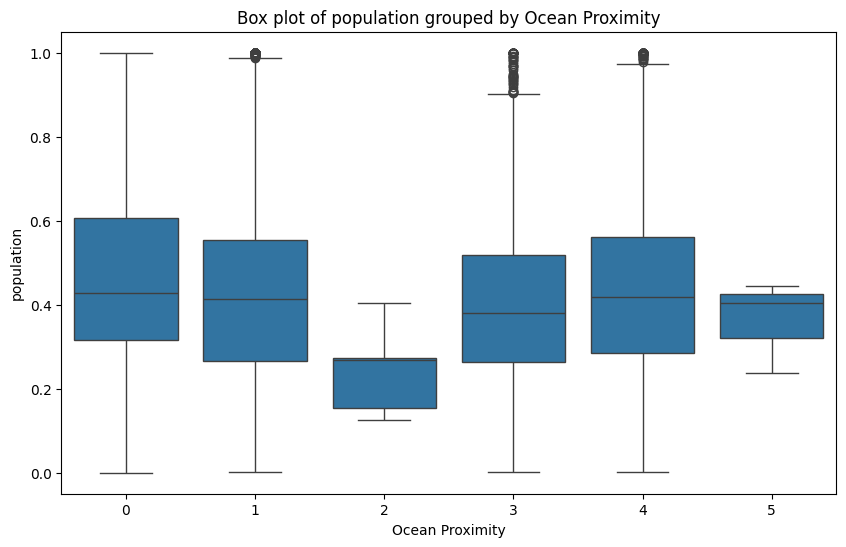

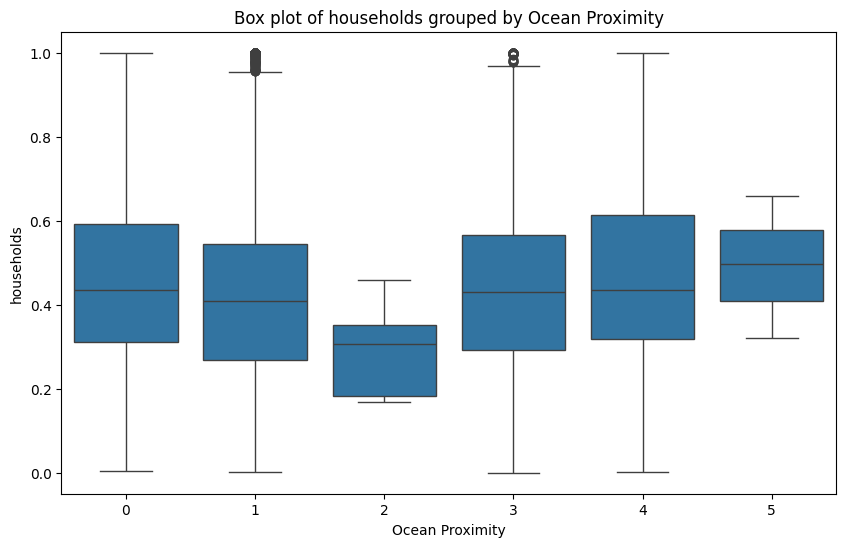

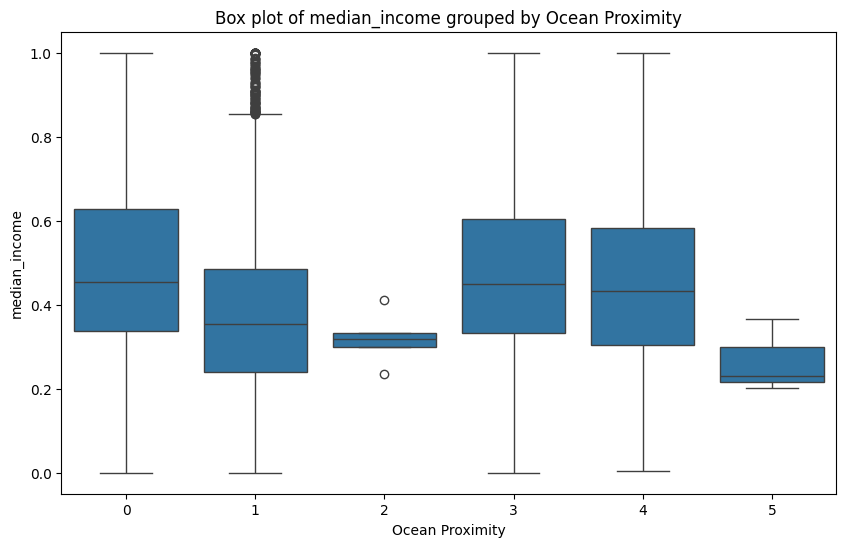

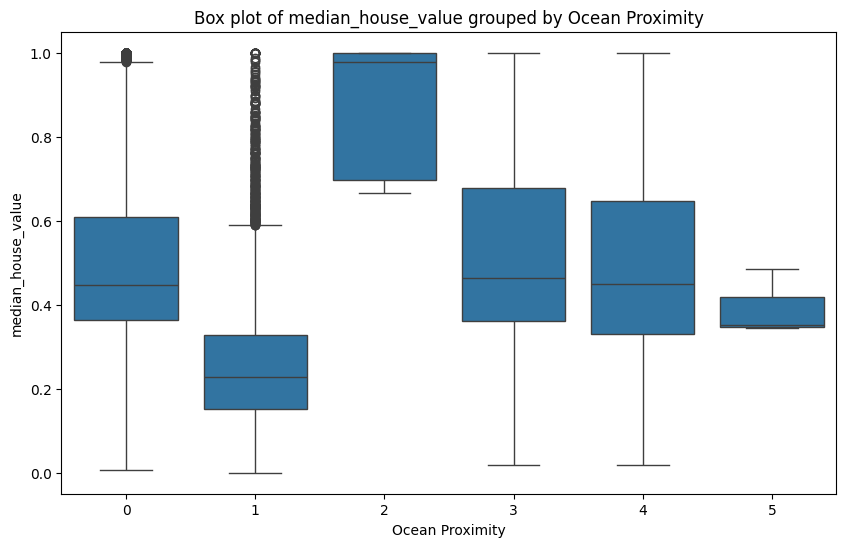

In [21]:
continuous_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y=column, data=df)
    plt.title(f'Box plot of {column} grouped by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(column)
    plt.show()

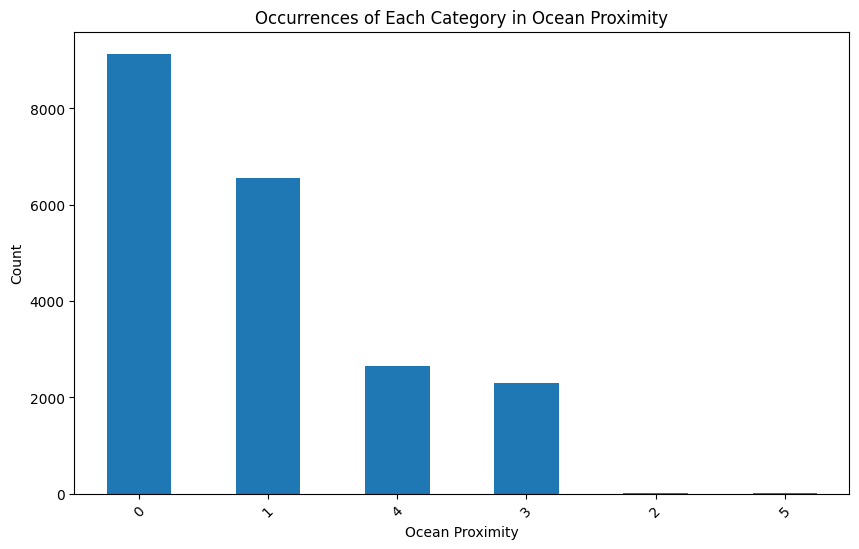

In [22]:
category_counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Occurrences of Each Category in Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

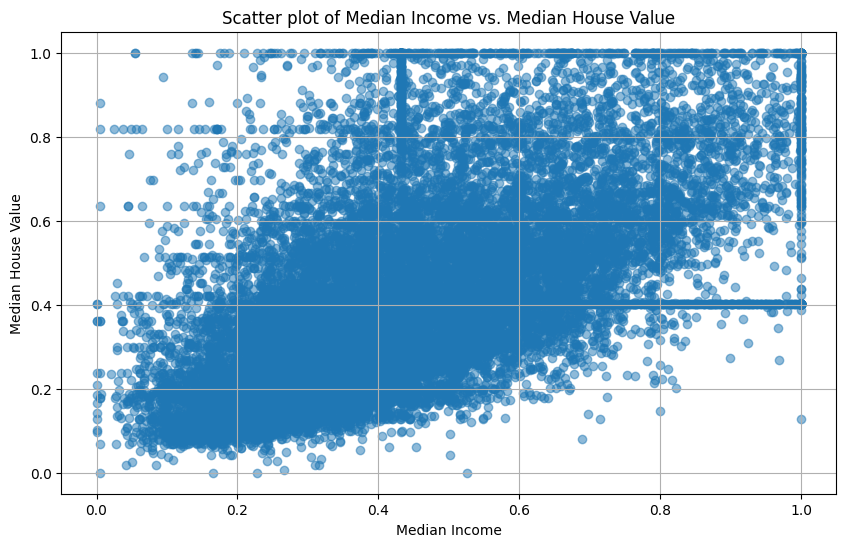

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.title('Scatter plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

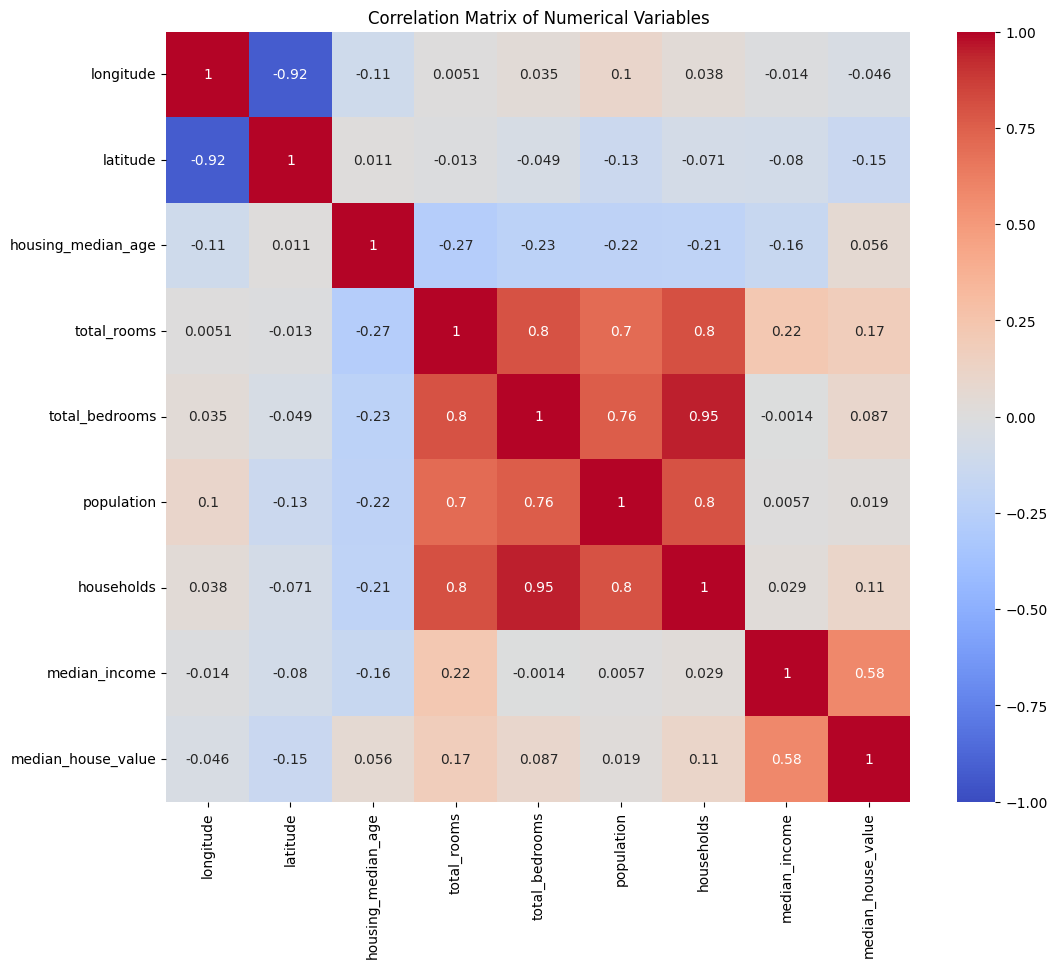

In [24]:
numerical_data = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                       'total_bedrooms', 'population', 'households', 'median_income',
                       'median_house_value']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


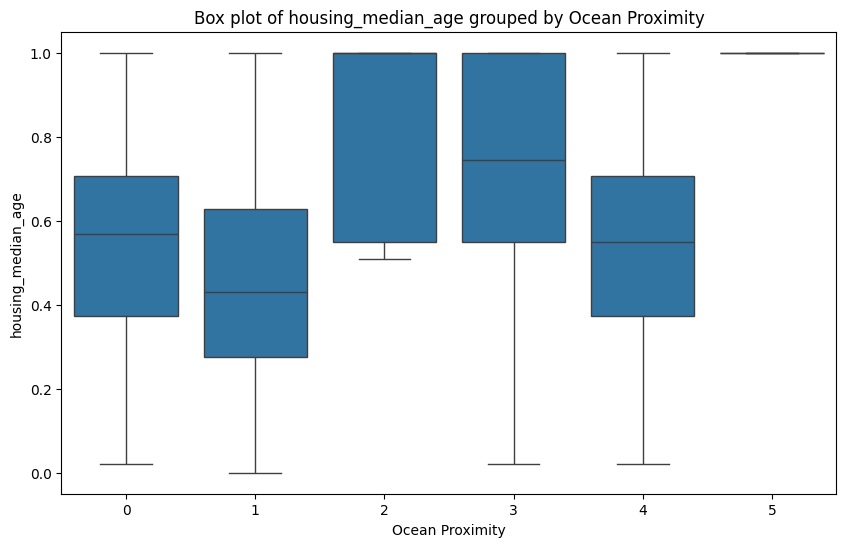

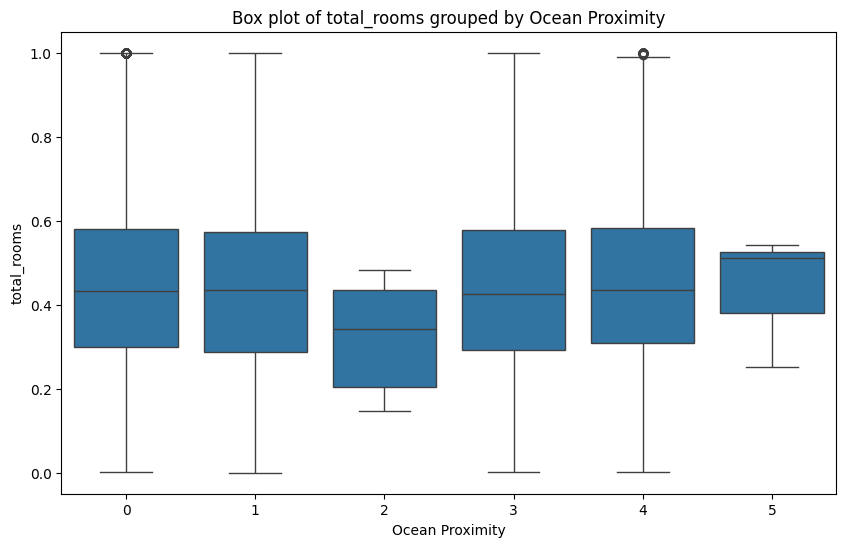

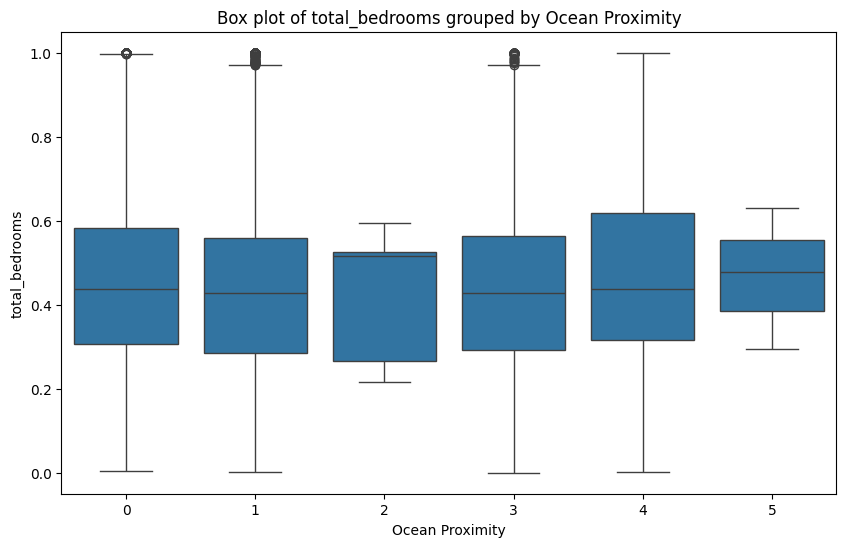

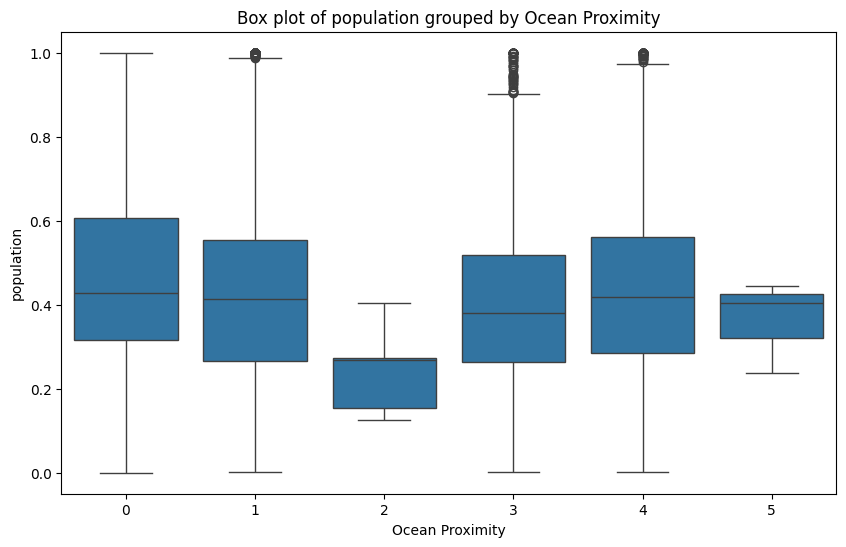

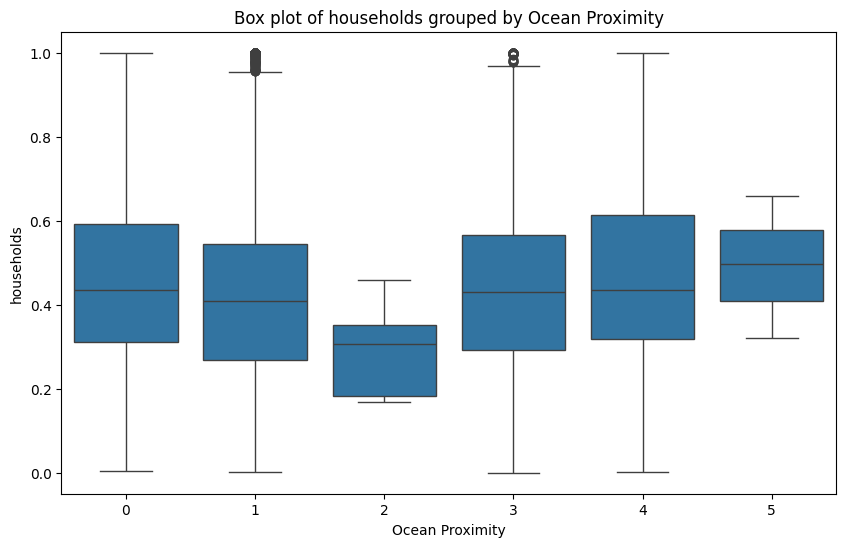

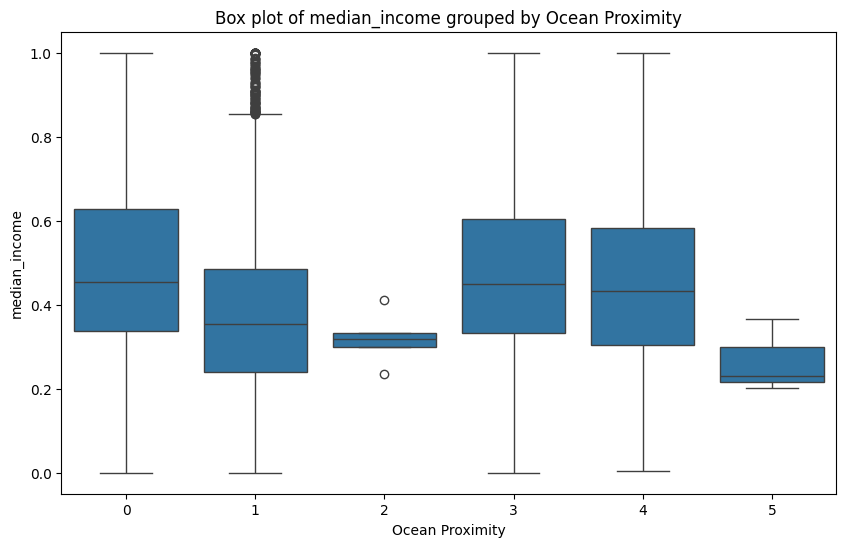

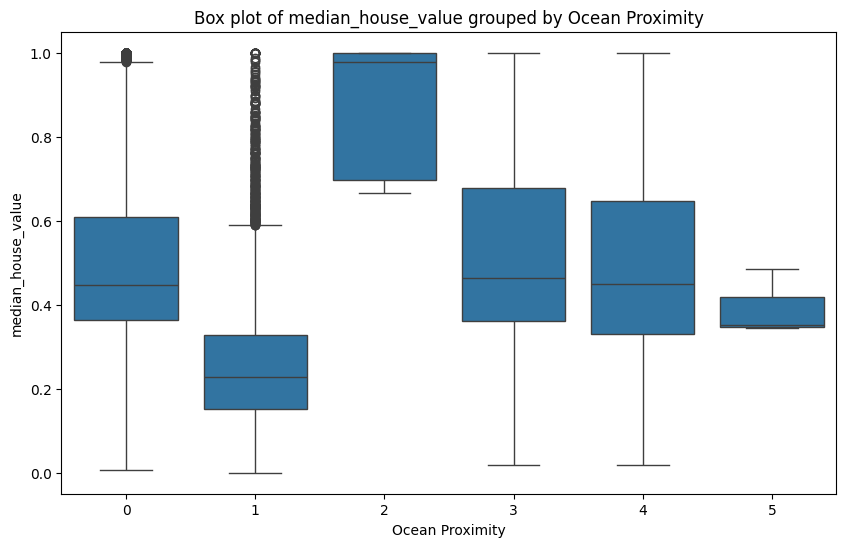

In [25]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y=column, data=df)
    plt.title(f'Box plot of {column} grouped by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(column)
    plt.show()

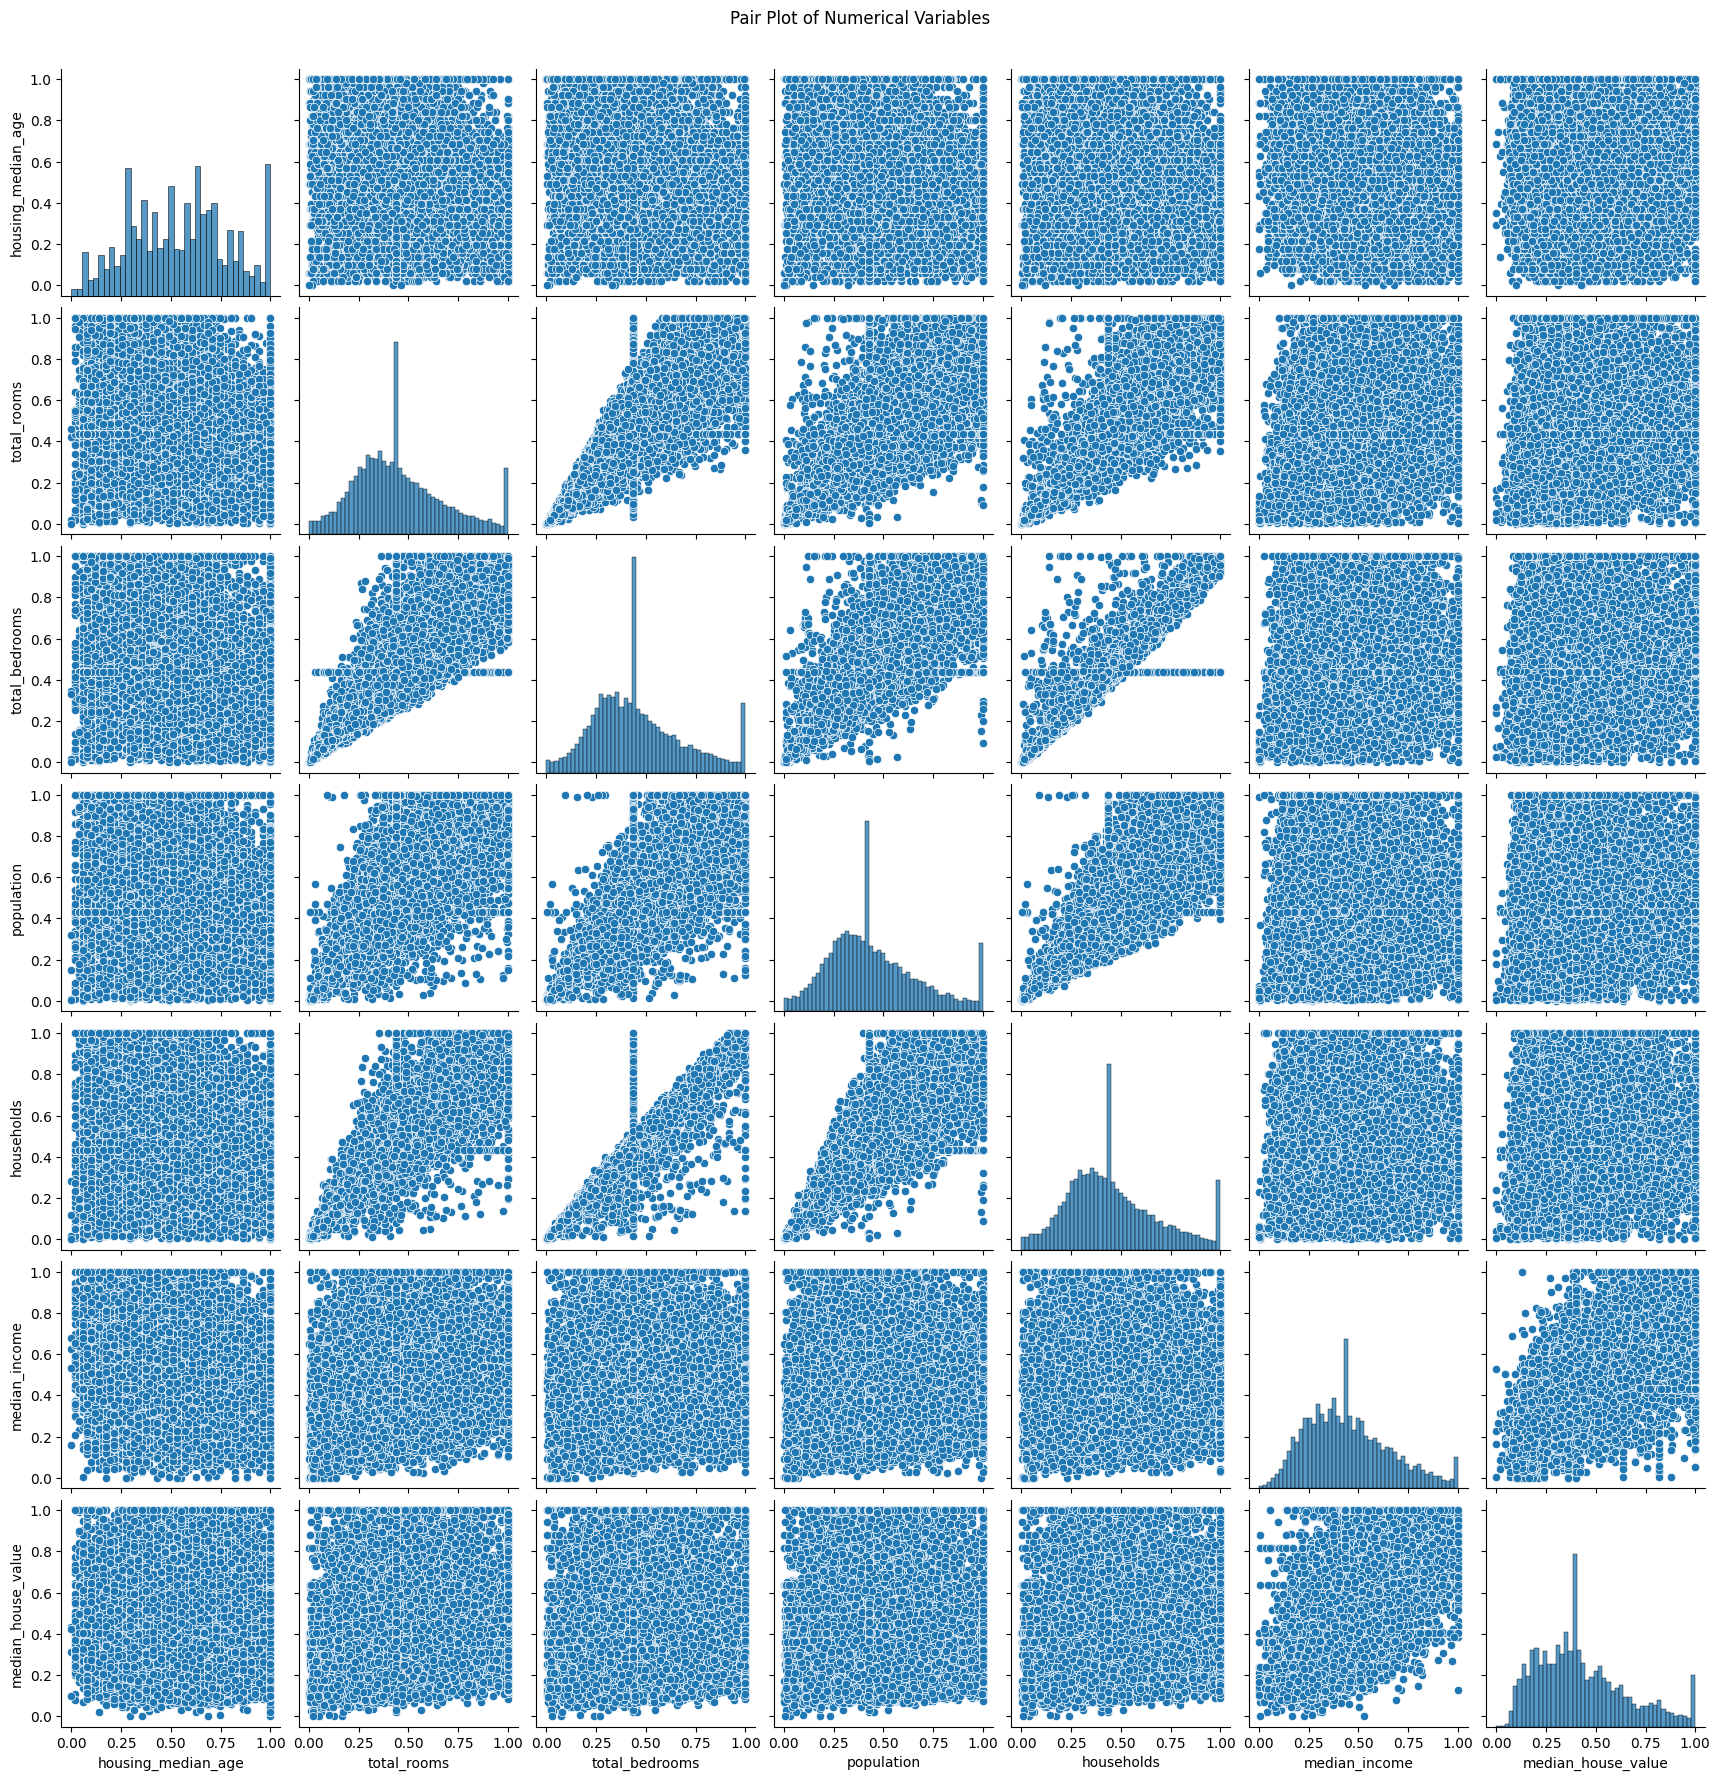

In [26]:
numerical_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

****count plot to the ocean proximity****

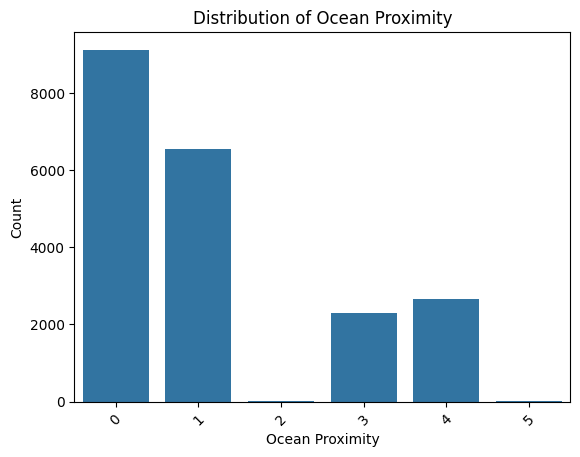

In [27]:
sns.countplot(x='ocean_proximity', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')
plt.xticks(rotation=45)
plt.show()

creating a new feature


In [28]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


In [29]:

print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())


   rooms_per_household  bedrooms_per_room  population_per_household
0             1.351856           0.717731                  0.882951
1             1.002408           2.295941                  2.033503
2             1.602031           0.635141                  0.969148
3             1.122992           0.905680                  0.880830
4                  NaN           0.845273                       NaN


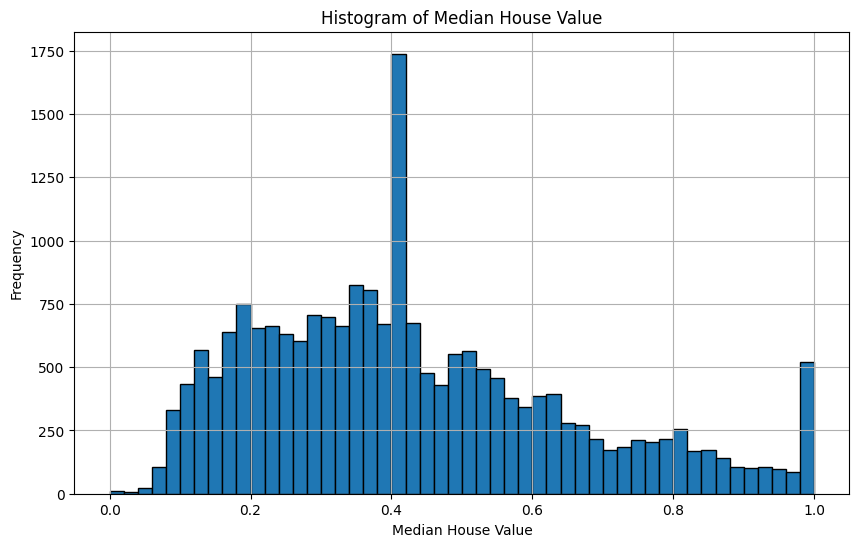

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50, edgecolor='k')
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-32-63879ef9c349>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['median_house_value'], shade=True)


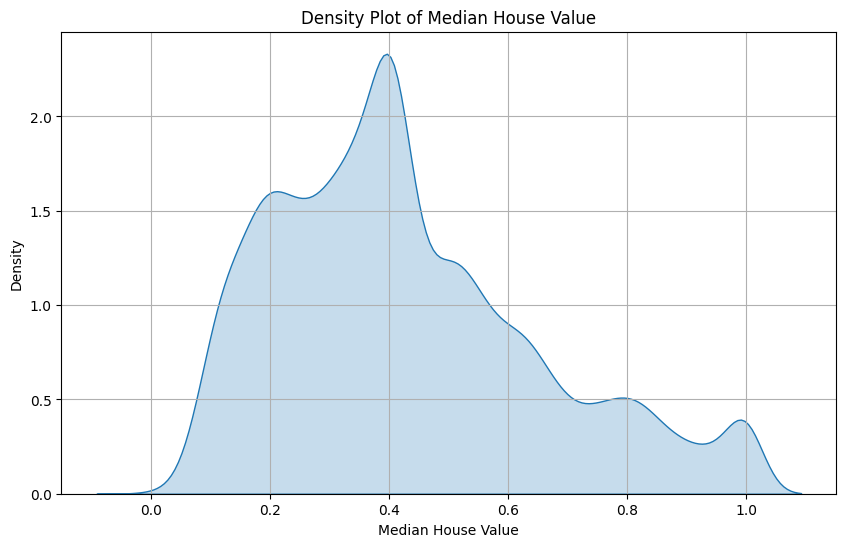

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['median_house_value'], shade=True)
plt.title('Density Plot of Median House Value')
plt.xlabel('Median House Value')
plt.grid(True)
plt.show()

In [33]:
summary_stats = df['median_house_value'].describe()
print(summary_stats)

count    20638.000000
mean         0.427120
std          0.223680
min          0.000000
25%          0.255685
50%          0.402593
75%          0.553411
max          1.000000
Name: median_house_value, dtype: float64


In [49]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error , mean_squared_error,r2_score


### Linear Regression

In [39]:
df.dropna(inplace=True)

In [40]:

linear_regression = LinearRegression()


In [41]:
x=df.iloc[:,7:8].values
y=df.iloc[:,8].values

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
linear_regression.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred=linear_regression.predict(X_test)
y_pred

array([0.41651838, 0.42536538, 0.39218688, ..., 0.77447167, 0.69002098,
       0.42802398])

In [44]:
linear_regression.predict([[9]])

array([5.81878964])

In [45]:
linear_regression.score(X_test,y_test)

0.3196785304404103

In [50]:
reg_score = r2_score(y_test , y_pred)
print('R squared of linear regression :',reg_score)

R squared of linear regression : 0.3196785304404103


In [51]:
mape = mean_absolute_percentage_error(y_test , y_pred)
print("Mean  absolute precentage error of linear regression : ",mape*100,'%')

Mean  absolute precentage error of linear regression :  31389724004774.695 %


### the best fit line

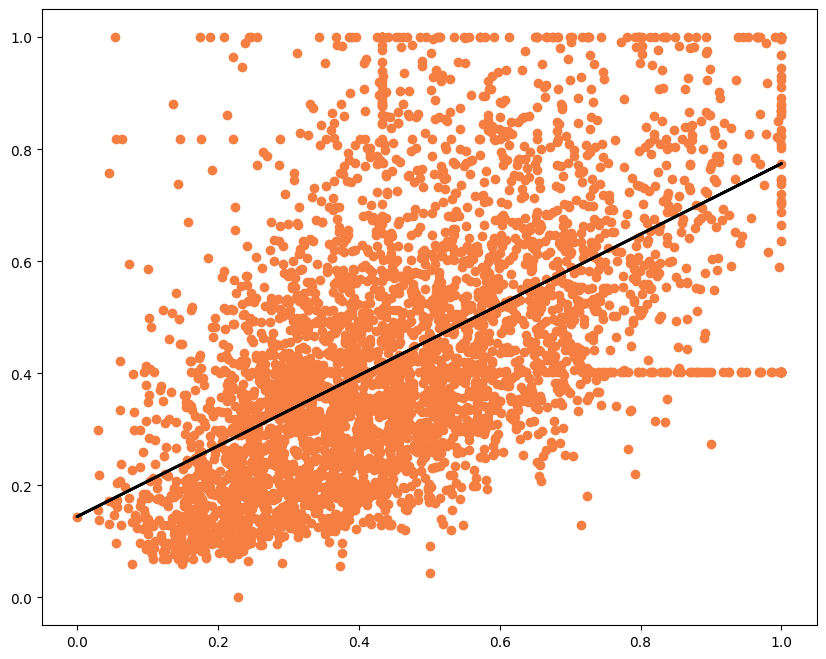

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test,  color='#f57e42')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.show()